

# Project: Investigation a data set - IMDB Movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I chose to analyze the IMDB Movie data set. The data contains information about movies made between 1960 and 2015. It includes the title, cast members, director, production studio, keywords, genres, runtime, release date, budget, and revenue. I was most interested in the adjusted revenue column and what factors would give me the highest revenue for a movie. I will study the following independent variables:

<ul>
    <li> Budget </li>
    <li> Month of release </li>
    <li> Director </li>
    <li> Cast members </li>
</ul>

I will try to answer the following questions:

>1: What factors affect the revenue of a movie?

>2: How can we use this information to possibly make a more profitable movie?

I will be using python 2.7, with numpy, pandas, and matplotlib


In [3]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling



### General Properties

> The source data is in a csv file. There are 21 columns in 10866 rows. Three columns contain pipe delimited strings. I also discovered nan's in these columns where there should be strings. The original_title column contains a lot of garbled text and I decided to leave it because it has no effect on my analysis. The revenue_adj column is float64 type data.

In [4]:
# Loads original data and gives a sample

filename = "tmdb-movies.csv"
original_df = pd.read_csv(filename)
original_df.head(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
movie_df = original_df.copy() # make copy of original data to work with

In [6]:
# found nan in cast column which should be all strings. This could cause problems

movie_df['cast'].dtype # returns type 'O' instead of string indicating mixed types

for m in movie_df['cast']: # returns nan if found. I used this code on other columns too
    if not isinstance(m, str):
        print m
        break


nan


In [7]:
#no nan's in this column

movie_df['release_date'].dtype

for m in movie_df['release_date']:
    if not isinstance(m, str):
        print m
        break


In [8]:
#  what type of data is revenue_adj?

movie_df['revenue_adj'].dtype

dtype('float64')



### Data Cleaning

> I needed to convert the cast column from pipe delimited string to a list, so that I could more easily sort data by individual cast members. I made a function for converting the column. I got an error at first because of the nan's in the column. I made a second fuction to convert nans to empty strings. Now my first function works. I decided to do the same with the other pipe delimited string type columns. I also added a month column to the dataframe to make it easier to sort it by month.

In [9]:
# cleanup work

def pipes_to_series(pdss): ## converts pipe delimited data to lists
    
    new_list = pdss.split("|")
    return new_list

def convert_nan_to_str(pdss): ## converts nan's in column to empty strings
    if isinstance(pdss, float):
        pdss = ''
    return pdss

        
movie_df['cast'] = movie_df['cast'].apply(convert_nan_to_str)    
movie_df['cast'] = movie_df['cast'].apply(pipes_to_series)

movie_df['genres'] = movie_df['genres'].apply(convert_nan_to_str)
movie_df['genres'] = movie_df['genres'].apply(pipes_to_series)

movie_df['production_companies'] = movie_df['production_companies'].apply(convert_nan_to_str)
movie_df['production_companies'] = movie_df['production_companies'].apply(pipes_to_series)

movie_df['imdb_id'] = movie_df['imdb_id'].apply(convert_nan_to_str) 


In [10]:
# make month column

def extract_month(ss):
    trio = ss.split('/')
    return int(trio[0])

movie_df['month'] = movie_df['release_date'].apply(extract_month)


<a id='eda'></a>
## Exploratory Data Analysis

I decided to look at various factors that may increase the revenue of a movie. I studied 4 different variables: High budget, the month released, the director, and the cast members.

### Does a high budget usually result in high revenue?

In [42]:
# make a new dataframe with the top 50 movies in budget

high_budget = movie_df.sort_values(by=('budget_adj'), ascending = False)[:50]


In [43]:
# normalize the budget_adj and revenue_adj columns

high_budget['budget_adj'] = (high_budget['budget_adj'] - high_budget['budget_adj'].mean()) / high_budget['budget_adj'].std()
high_budget['revenue_adj'] = (high_budget['revenue_adj'] - high_budget['revenue_adj'].mean()) / high_budget['revenue_adj'].std()


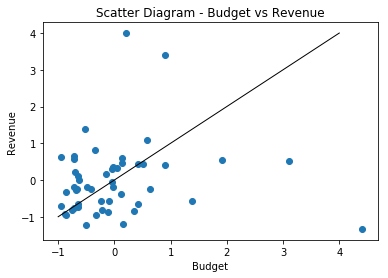

In [45]:
#Make scatter plot of 50 highest budget movies vs their revenue

plt.ylabel('Revenue')
plt.xlabel('Budget')
plt.title('Scatter Diagram - Budget vs Revenue')
plt.scatter( high_budget['budget_adj'],high_budget['revenue_adj'] )
plt.plot([-1,4],[-1,4], 'black', linewidth=1)

> It doesn't look like there is a strong correlation between high budgets and revenue.

### What months are the highest revenue movies released?

In [46]:

# Makes is list of the mean adjusted revenue by month.

print movie_df.groupby('month')['revenue_adj'].mean().sort_values(ascending = False)


month
6     9.759761e+07
12    8.476453e+07
5     7.624643e+07
7     7.329208e+07
11    7.186496e+07
3     4.944458e+07
4     3.971626e+07
8     3.546830e+07
2     3.393971e+07
10    3.334361e+07
9     2.325910e+07
1     1.895000e+07
Name: revenue_adj, dtype: float64


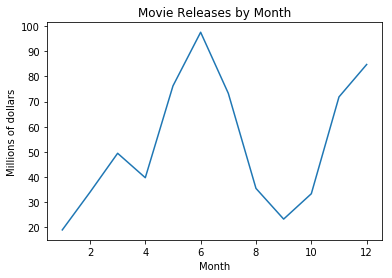

In [47]:
# makes a chart of mean revenue by month

plt.ylabel('Millions of dollars')
plt.xlabel('Month')
plt.title('Movie Releases by Month')
plt.plot(movie_df.groupby('month')['revenue_adj'].mean()/10**6)

> It looks like June and December could be the best months to release a movie.

### Which directors have the highest revenue?

In [48]:
# Gives a list oof top five directors by total adjusted revenue
movie_df.groupby('director')['revenue_adj'].sum().sort_values(ascending = False).head(5)


director
Steven Spielberg    1.520245e+10
James Cameron       7.327221e+09
Peter Jackson       7.019848e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.655648e+09
Name: revenue_adj, dtype: float64

In [49]:
# Who directed the most movies

movie_df.groupby('director')['revenue_adj'].count().sort_values(ascending = False).head(5)

director
Woody Allen         45
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     29
Ridley Scott        23
Name: revenue_adj, dtype: int64

> Steven Spielberg could be the best director for our movie.

### Which cast members have the highest revenue?

In [50]:
# This one took a lot more effort because each movie has a list of cast members. I had to compile a new data frame
# and organize it by cast member. It must include a list of movie adjusted revenue for each cast member.


# Returns cast and revenue adjusted columns
def return_cast(ss):
    return ss['cast'], ss['revenue_adj']


# makes list of cast members and the adjusted revenue all of their movies made
cast_dict = dict()   
cast_list =  movie_df.apply(return_cast, axis = 1).to_list()
for i in cast_list:
    for p in i[0]:
        if  p not in cast_dict:
            cast_dict[p] = [i[1]]
        else:
            cast_dict[p].append(i[1])
            

In [51]:
# construct new dataframe for cast information. Sorry it runs a little long

cast_df = pd.DataFrame(columns = ('cast', 'adjusted_revenue'))
for i in cast_dict:
    temp_series = pd.Series([i, cast_dict[i]], index = ['cast', 'adjusted_revenue'])
    cast_df = cast_df.append(temp_series,  ignore_index=True)
cast_df.head()       

,cast,adjusted_revenue
0,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13849..."
1,Takumi Yamazaki,[0.0]
2,Alex Zahara,"[0.0, 0.0]"
3,Lilach Mendelovich,[0.0]
4,Vince Gilligan,[0.0]


In [52]:
# adds column for total adjusted revenue

list_of_sums = cast_df['adjusted_revenue'].apply(sum)
cast_df['total_adj_revenue'] = list_of_sums
cast_df.head()

,cast,adjusted_revenue,total_adj_revenue
0,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13849...",3.421537e+07
1,Takumi Yamazaki,[0.0],0.000000e+00
2,Alex Zahara,"[0.0, 0.0]",0.000000e+00
3,Lilach Mendelovich,[0.0],0.000000e+00
4,Vince Gilligan,[0.0],0.000000e+00


In [53]:
# remove the first row without a cast name
cast_df = cast_df.drop(0, axis = 0)
cast_df.head()

,cast,adjusted_revenue,total_adj_revenue
1,Takumi Yamazaki,[0.0],0.0
2,Alex Zahara,"[0.0, 0.0]",0.0
3,Lilach Mendelovich,[0.0],0.0
4,Vince Gilligan,[0.0],0.0
5,Flavia Roberto,[0.0],0.0


In [54]:
#make new DataFrame for top ten list.

top_ten_df = cast_df.sort_values(by=['total_adj_revenue'], ascending = False)[:10]

del top_ten_df['adjusted_revenue'] # column not needed so I deleted it

In [55]:
print top_ten_df # Here's our top ten list

                   cast  total_adj_revenue
8427      Harrison Ford       1.468348e+10
2554         Tom Cruise       1.121280e+10
16829         Tom Hanks       1.067239e+10
15630       Emma Watson       8.806337e+09
8693       Ian McKellen       8.671323e+09
6286       Eddie Murphy       8.572390e+09
4976        Johnny Depp       8.564524e+09
16431  Daniel Radcliffe       8.515082e+09
11537      Rupert Grint       8.358390e+09
17573      Bruce Willis       8.253051e+09


In [56]:
# Who has starred in the most movies?

def cnt_of_movies(df): # returns count of movies starred in
    movies = len(df['adjusted_revenue'])
    return movies

#adds movie count column
cast_df['movie_count'] = cast_df.apply(cnt_of_movies, axis = 1)

# Gives top 20 list in number of movies starred in
cast_df.sort_values(by=('movie_count'),ascending = False).head(20)
                                                              
                                                               


,cast,adjusted_revenue,total_adj_revenue,movie_count
4740,Robert De Niro,"[178999419.48, 93043293.341, 46125.099705, 0.0...",6.614369e+09,72
14630,Samuel L. Jackson,"[143299244.588, 371497801.661, 5588.99754084, ...",7.977077e+09,71
17573,Bruce Willis,"[0.0, 15432.9932095, 2779009.65724, 245550715....",8.253051e+09,62
9230,Nicolas Cage,"[0.0, 0.0, 18129765.1494, 0.0, 0.0, 0.0, 21788...",5.720664e+09,61
18433,Michael Caine,"[371497801.661, 129164861.167, 572690645.123, ...",5.722743e+09,53
10062,Robin Williams,"[0.0, 321851579.072, 0.0, 0.0, 116195.636055, ...",7.555305e+09,51
12062,John Cusack,"[0.0, 245550715.734, 52109.8051063, 26381683.5...",2.406061e+09,50
7922,John Goodman,"[22079990.2848, 142754407.651, 36080177.2916, ...",4.476072e+09,49
11678,Morgan Freeman,"[0.0, 3352102.24508, 426796807.314, 94908538.4...",5.081434e+09,49
17827,Susan Sarandon,"[145146.496136, 92593075.7901, 0.0, 95059446.2...",1.872676e+09,48


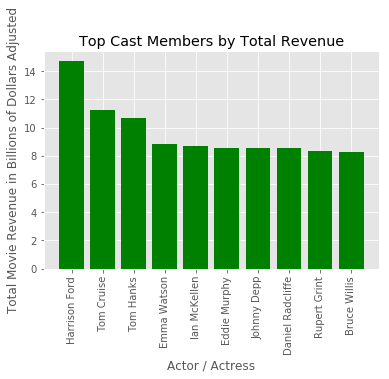

In [57]:
#Plot bar graph of top cast emebers in terms of adjusted revenue

def convert_to_billions(df): #converts ugly float notation to value in billions
    newval = df / 10**9
    return newval

plt.style.use('ggplot')
x = top_ten_df['cast']
rev = top_ten_df['total_adj_revenue'].apply(convert_to_billions)
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, rev , color = 'green')
plt.title('Top Cast Members by Total Revenue')
plt.ylabel('Total Movie Revenue in Billions of Dollars Adjusted')
plt.xlabel('Actor / Actress')
plt.xticks(x_pos, x, rotation = 'vertical')
plt.show()


> It looks like Harrison Ford could be the best choice to star in our movie.

<a id='conclusions'></a>
## Conclusions

> I wanted to see what factors which factors could be involved in making a blockbuster movie. I used the revenue_adj column as a dependent variable. I studied 4 independent variables: Budget, month of movie release, director, and cast member. I have not run any analytical tests here so this is mostly observational.

1. It appears that there isn't a strong correlation between having a big budget and how much money a movie will make.

2. I found that movies released in June have the highest adjusted revenue on average. Maybe this is the reason for the term Summer Blockbuster.

3. Stephen Spielburg movies have the highest total adjusted revenue. It may be because he has directed so many movies, he is in the top 3 in movies directed in our data, but Woody Allen has directed far more.

4. Movies starring Harrison Ford have the highest total adjusted revenue. Harrison is not even top 20 in total movie credits which makes him a very strong option.

> According to my observations, If I were making a movie and wanted the highest revenue, I would release it in June, get Steven Spielburg to direct it, or Harrison Ford to star in it.

## Limitations

My analysis was based on a limited set of data originating from the IMDB Movie database. The data is incomplete and has a few issues.

1. Many movies were missing budget and revenue information resulting in many movies were left out of my work.
2. This is not a complete list of all the movies over this time period
3. Some of the movies on the list show no cast members which affects the accuracy of my cast variable.
4. The original titles for some of the biggest movies had garbled text
5. There is a lot of missing data in different columns that may give it bias towards movies with more complete data.


## References

> Websites I used to help with my python:

https://benalexkeen.com/bar-charts-in-matplotlib/,

https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html,

https://note.nkmk.me/en/python-pandas-drop/,

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html,

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html,

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
